In [35]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, KFold

## Data import

In [25]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
all_surfaces_206 = pd.concat([nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206])

nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces_86 = pd.concat([nucleus_dataset_p4g4_86, nucleus_dataset_smooth_86, nucleus_dataset_tcps_86])

# 20x CD86 model on CD206 dataset. P4G4+TCPS+Smooth data

## Train XGBClassifier

In [32]:
pipe, test_data_86 = macrophages_analysis.make_nucleus_classifier(all_surfaces_86, confusion_matrix=False)

X_nucleus = all_surfaces_206.drop('CellType', axis=1)
y_nucleus = all_surfaces_206['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data_206 = (X_nucleus, y_nucleus)

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8723905061631262
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8762772232039573
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8726059846367364


--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9282109008032464
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9331728901360208
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9282550605379057


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

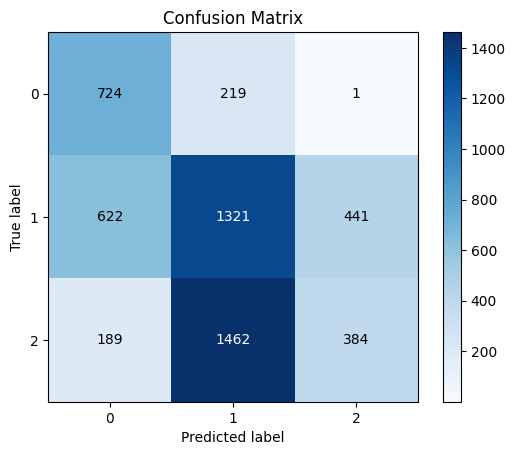

In [45]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf,scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf,scoring='f1_weighted')
print('--------')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))
y_pred = pipe.predict(X_nucleus)
skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.699762139906247
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7300946466768822
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.6934677157104666


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

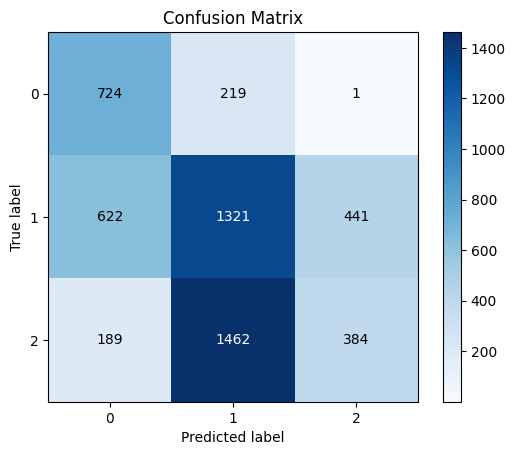

In [40]:
# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))
y_pred = pipe.predict(X_nucleus)
skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

AUC score for M1 0.8859957099734965
AUC score for M2 0.49990326581371614
AUC score for NT 0.638339721933472
Average AUC 0.6747462325735616


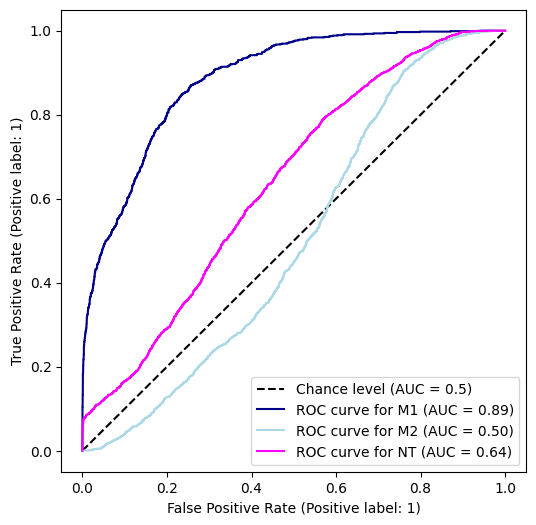

In [47]:
macrophages_analysis.make_multiclass_roc(pipe, test_data_206)

In [4]:
class_probabilities = pipe.predict_proba(X_nucleus)

c:\_\jupyter_3\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\_\jupyter_3\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\_\jupyter_3\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\_\jupyter_3\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

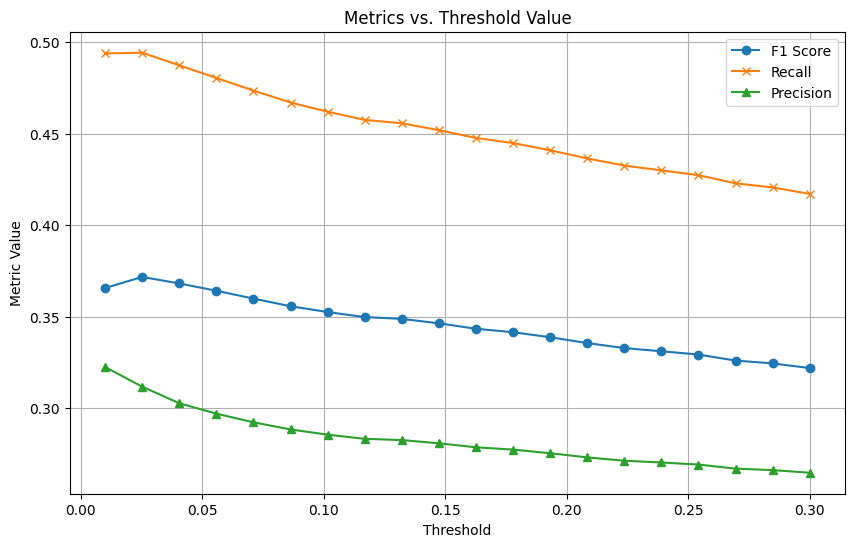

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Assuming you already have your `y_test` and `model_randomized` as in your code
# X_test should also be defined in your context
y_test = y_nucleus
thresholds = np.linspace(0.01, 0.3, 20)  # Vary threshold from 0.1 to 0.9 with 0.05 increments
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_test_pred = (class_probabilities[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_test_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_test_pred, average='weighted'))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.plot(thresholds, precisions, label='Precision', marker='^')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Threshold Value')
plt.legend()
plt.grid()
plt.show()

AUC score for M1 0.8859957099734965
AUC score for M2 0.49990326581371614
Average AUC 0.6929494878936063


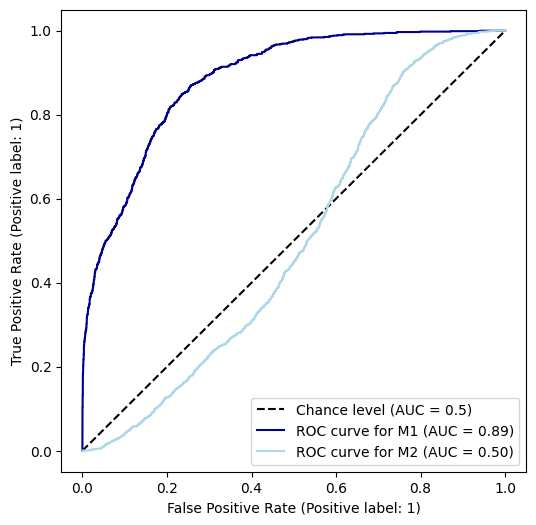

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import re
from xgboost import XGBClassifier
from itertools import cycle
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix
from sklearn.utils import class_weight# Binarize the labels into one-hot encoded format
y_test = label_binarize(y_nucleus, classes=[0, 1, 2])

# Predict class probabilities using the classifier
class_probabilities = pipe.predict_proba(X_nucleus)[:, :2]

# Initialize empty lists for storing ROC curve data for each class
n_classes = 2
fpr = [0] * 2
tpr = [0] * 2
thresholds = [0] * 2
auc_score = [0] * 2

precision_scores = [0] * 2
recall_scores = [0] * 2
f1_scores = [0] * 2

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], class_probabilities[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the chance level line (AUC = 0.5)
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

# Define target names and colors for plotting ROC curves
target_names = ['M1', 'M2']
colors = cycle(["darkblue", "lightblue"])

# Plot ROC curves for each class
for class_id, color in zip(range(2), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        class_probabilities[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax)

print('AUC score for M1', auc_score[0])
print('AUC score for M2', auc_score[1])
print('Average AUC', sum(auc_score) / n_classes)

In [7]:
mask = (y_nucleus != 2)
y_nucleus_m1m2 = y_nucleus[mask]
class_probabilities_m1m2 = class_probabilities[mask]

confusion_matrix(y_nucleus_m1m2, class_probabilities_m1m2[:, 0:1] > 0.2)

array([[ 145,  799],
       [1571,  813]], dtype=int64)

In [8]:
mask

array([ True,  True,  True, ..., False, False, False])

In [9]:
y_nucleus

array([0, 0, 0, ..., 2, 2, 2])

In [10]:
y_nucleus_m1m2

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
class_probabilities

array([[9.9979872e-01, 1.5799669e-04],
       [9.9957937e-01, 3.7281140e-04],
       [9.9430507e-01, 3.6966577e-03],
       ...,
       [5.5749295e-03, 9.7885066e-01],
       [3.2678226e-04, 9.9830014e-01],
       [1.2615680e-03, 9.9239385e-01]], dtype=float32)

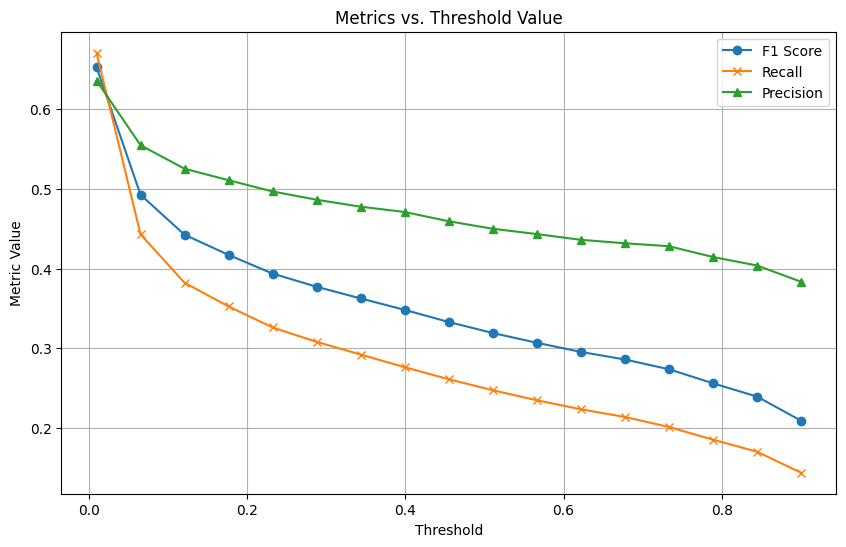

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Assuming you already have your `y_test` and `model_randomized` as in your code
# X_test should also be defined in your context
y_test = y_nucleus_m1m2
thresholds = np.linspace(0.01, 0.9, 17)  # Vary threshold from 0.1 to 0.9 with 0.05 increments
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_test_pred = (class_probabilities_m1m2[:, 0:1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.plot(thresholds, precisions, label='Precision', marker='^')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Threshold Value')
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

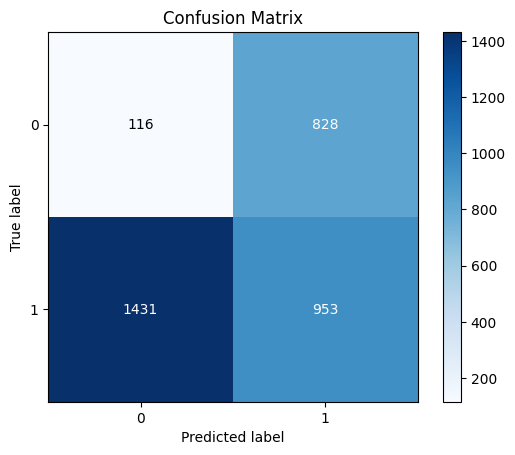

In [13]:
# In the lower left corner are:
# all M2 incorrectly classified as M1
# all M1 and M2 incorrectly classified as NT

skplt.metrics.plot_confusion_matrix(y_nucleus_m1m2, class_probabilities_m1m2[:, 0:1] > 0.1, normalize=False, title='Confusion Matrix')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

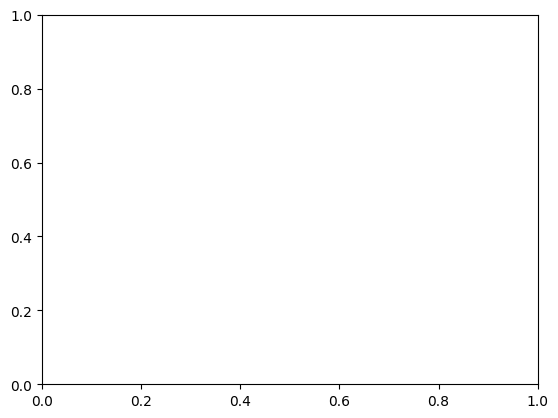

In [14]:
# In the lower left corner are:
# all M2 incorrectly classified as M1
# all M1 and M2 incorrectly classified as NT

skplt.metrics.plot_confusion_matrix(y_nucleus_m1m2, class_probabilities_m1m2[:, 0:1], normalize=False, title='Confusion Matrix')

In [ ]:
mask = (y_nucleus == 2)
y_test[mask]

In [ ]:
class_labels = np.where(class_probabilities[:, 0] > class_probabilities[:, 1], 0, 1)

class_labels

In [ ]:
class_probabilities

In [ ]:
# y_test  0, 0, 1, 2
# y_pred 0, 0, 2, 1
# I cannot drop NT from y_pred or y_test because in y_pred some NT are misclassified and it will introduce errors  

In [ ]:
skplt.metrics.plot_confusion_matrix(y_nucleus, class_labels, normalize=False, title='Confusion Matrix')

In [ ]:
class_probabilities[:, :2]

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD86 model on CD206 dataset. P4G4 data

In [ ]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_86, confusion_matrix=False)

X_nucleus = nucleus_dataset_p4g4.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_p4g4['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)
skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD86 model on CD206 dataset. Smooth data

In [ ]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_86, confusion_matrix=False)

X_nucleus = nucleus_dataset_smooth.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_smooth['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)
skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD86 model on CD206 dataset. TCPS data

In [ ]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_86, confusion_matrix=False)

X_nucleus = nucleus_dataset_tcps.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_tcps['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)
skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)